In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec


In [5]:
df = pd.read_csv(r"/Users/vimal/Downloads/Old/jupuytr/creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


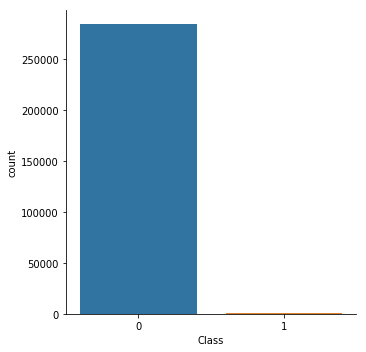

In [9]:
sns.catplot(x ="Class",kind='count',data=df,height=5)
plt.show()

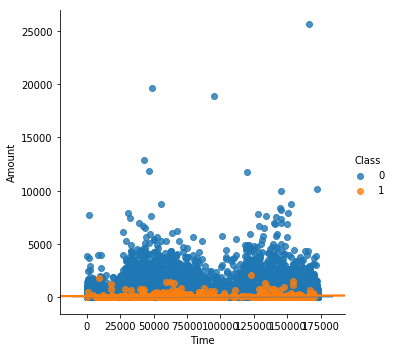

In [10]:
ax = sns.lmplot(y="Amount", x="Time", 
                data=df, hue='Class')
ax
plt.show()

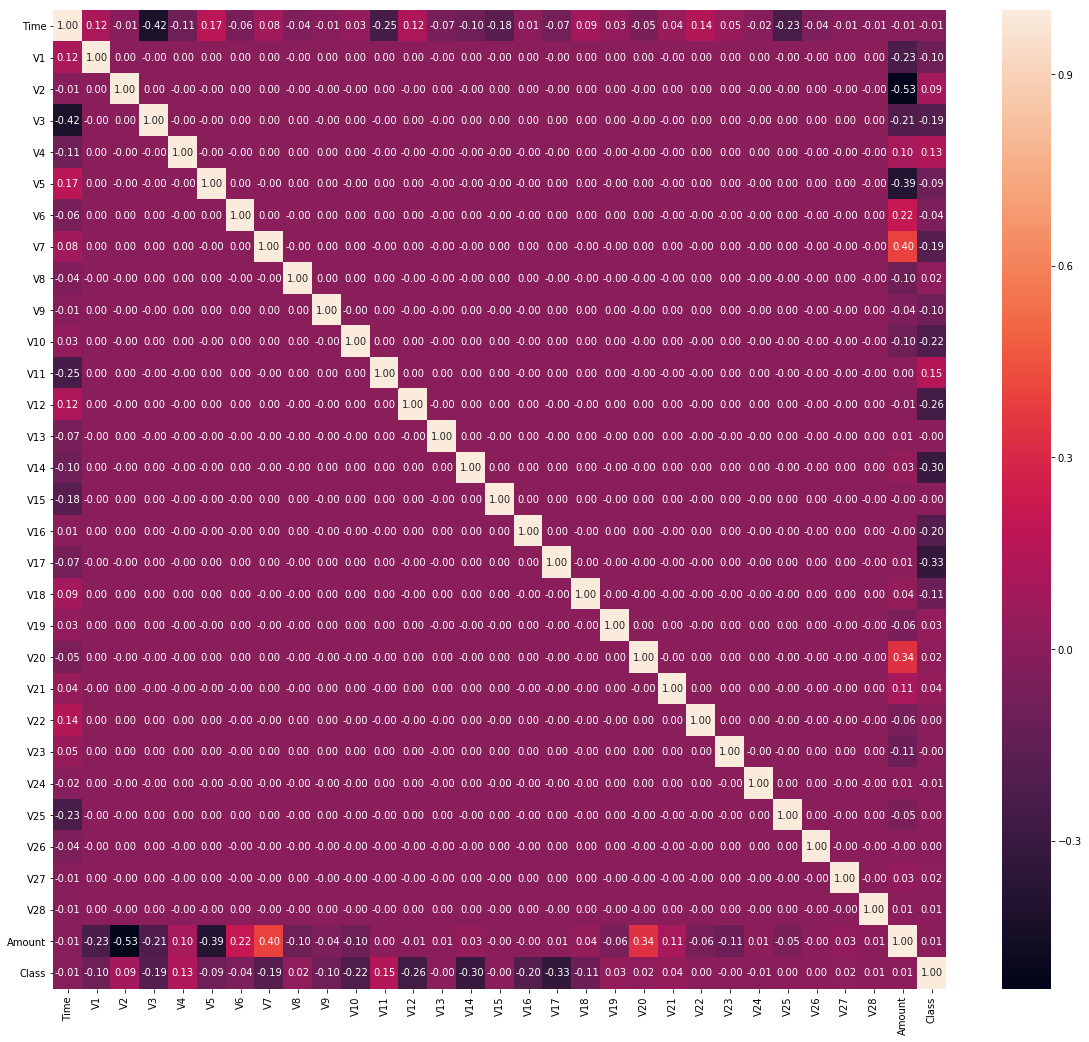

In [11]:
fig, ax = plt.subplots(figsize=(20,18))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

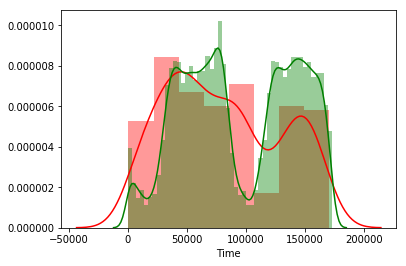

In [12]:
sns.distplot(df[df['Class'] == 1]["Time"], 
             color='r')
sns.distplot(df[df['Class'] == 0]["Time"], 
             color='g')
plt.show()

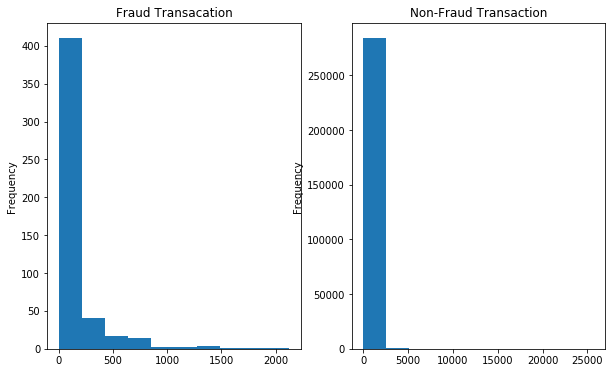

In [13]:
fraud_transacation = df[df["Class"]==1]
non_fraud_transacation= df[df["Class"]==0]
plt.figure(figsize=(10,6))
plt.subplot(121)
fraud_transacation.Amount.plot.hist(title="Fraud Transacation")
plt.subplot(122)
non_fraud_transacation.Amount.plot.hist(title="Non-Fraud Transaction")

plt.show()

In [14]:
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction max amount")
print(df_fraud["Amount"].max())
print("Normal transaction max amount")
print(df_normal["Amount"].max())

Fraud transaction max amount
2125.87
Normal transaction max amount
25691.16


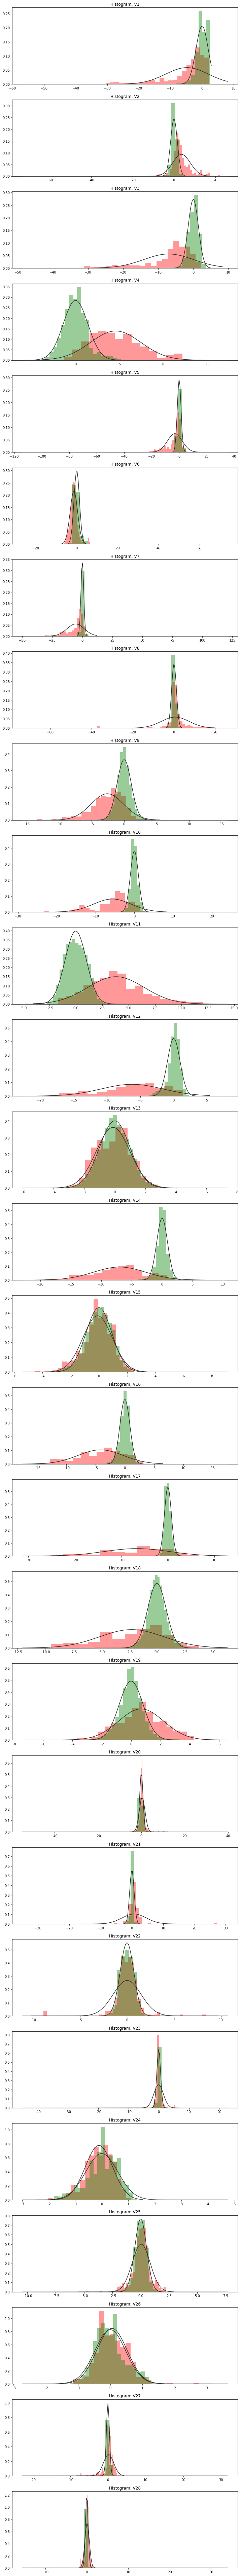

In [15]:
from scipy import stats

plt.figure(figsize=(12,28*5))
Tabfeatures = df.iloc[:,1:29].columns
f= gridspec.GridSpec(28, 1)
for i, cl in enumerate(df[Tabfeatures]):
    ax = plt.subplot(f[i])
    sns.distplot(df[cl][df.Class == 1], kde=False, fit=stats.norm,color='r')
    sns.distplot(df[cl][df.Class == 0], kde=False, fit=stats.norm,color='g')
    ax.set_xlabel('')
    ax.set_title('Histogram: ' + str(cl))
plt.show()

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, classification_report


In [17]:

X = df.drop('Class', axis =1)
y = df["Class"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=4)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_rf =RandomForestClassifier()

tuned_parameters = [{'max_features': ["auto","sqrt","log2",None],'max_depth' : [5,50,5],
                     'min_samples_leaf': range(5,60,5), 'n_estimators' : [0.20,0.22,0.20],
                     'bootstrap' : [True,False],'oob_score': [True,False] }
                   ]

In [20]:
model_rf.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_pred_rf = model_rf.predict(X_test)
model_rf.score(X_test,y_pred_rf)

1.0

In [22]:
scores= cross_val_score(model_rf,X_test,y_test,cv=5)
scores.mean()

0.9994254458896972

In [23]:
auc_roc_rf=metrics.classification_report(y_test,y_pred_rf)

In [24]:
auc_roc_rf =metrics.roc_auc_score(y_test,y_pred_rf)
auc_roc_rf

0.8788500134979603

In [25]:
confusion_matrix_rf = metrics.confusion_matrix(y_test,y_pred_rf.round())
confusion_matrix_rf


array([[93820,     6],
       [   39,   122]])

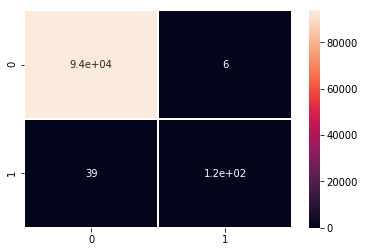

In [26]:
sns.heatmap(confusion_matrix_rf,linewidths=.5,annot=True,vmin=0.01)

In [27]:
print(metrics.classification_report(y_test, y_pred_rf.round()))
print(metrics.accuracy_score(y_test, y_pred_rf.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93826
           1       0.95      0.76      0.84       161

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.98      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987

0.999521210380159


In [28]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_rf, true_positive_rate_rf, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(false_positive_rate_rf, true_positive_rate_rf)


Text(0.5, 0, 'False Positive Rate')

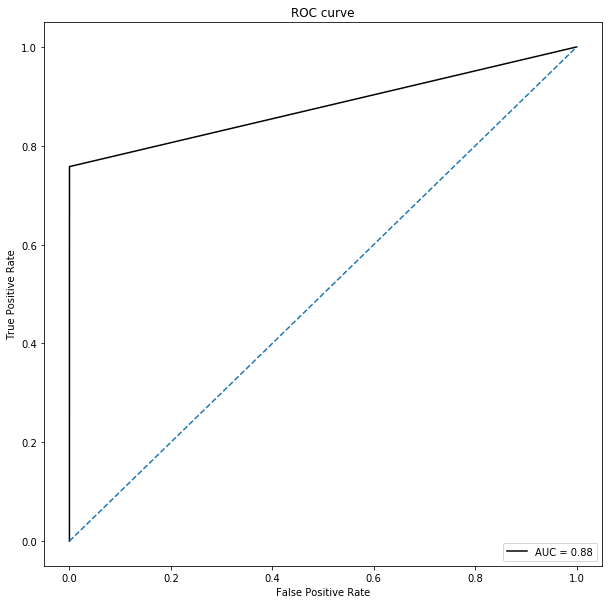

In [29]:
plt.figure(figsize=(10,10))
plt.title('ROC curve')
plt.plot(false_positive_rate_rf,true_positive_rate_rf, color='black',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [30]:
import lightgbm as lgb

In [ ]:
model_gbm = lgb.LGBMRegressor(objective='regression', num_leaves=31,
                        learning_rate=0.02, n_estimators=10000,max_bin = 100)
model_gbm.fit(X_train, y_train, 
        eval_set=[(X_test, y_test)],
        eval_metric='auc',early_stopping_rounds=500)

y_pred_gbm = gbm.predict(X_test)


In [219]:
model_gbm.score(X_test,y_pred_gbm)

1.0

In [220]:
scores= cross_val_score(model_gbm,X_test,y_test,cv=5)
scores.mean()

0.7294205452243165

In [222]:
auc_roc_gbm=metrics.classification_report(y_test,y_pred_gbm.round())

In [223]:
auc_roc_gbm =metrics.roc_auc_score(y_test,y_pred_gbm)
auc_roc_gbm

0.990282560833831

In [224]:
confusion_matrix_gbm =metrics.confusion_matrix(y_test,y_pred_gbm.round())
confusion_matrix_gbm


array([[93817,     9],
       [   31,   130]], dtype=int64)

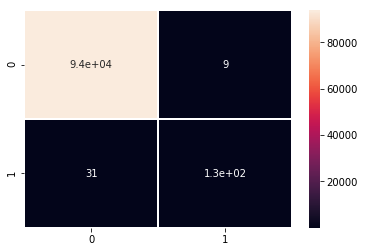

In [262]:
sns.heatmap(confusion_matrix_gbm,linewidths=.5,annot=True,vmin=0.01)

In [225]:
print(metrics.classification_report(y_test, y_pred_gbm.round()))
print(metrics.accuracy_score(y_test, y_pred_gbm.round()))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93826
          1       0.94      0.81      0.87       161

avg / total       1.00      1.00      1.00     93987

0.999574409226808


In [226]:
TN_gbm=confusion_matrix[0][0]
FN_gbm=confusion_matrix[1][0]
TP_gbm=confusion_matrix[1][1]
FP_gbm=confusion_matrix[0][1]
TN_gbm,FN_gbm,TP_gbm,FP_gbm

(93811, 31, 130, 15)

In [227]:
Recall_gbm =(TP_gbm/(TP_gbm+FN_gbm))
Recall_gbm

0.8074534161490683

In [228]:
Precision_gbm =(TP_gbm/(TP_gbm+FP_gbm))
Precision_gbm

0.896551724137931

In [229]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_gbm, true_positive_rate_gbm, thresholds = roc_curve(y_test, y_pred_gbm)
roc_auc = auc(false_positive_rate_gbm, true_positive_rate_gbm)


Text(0.5,0,'False Positive Rate')

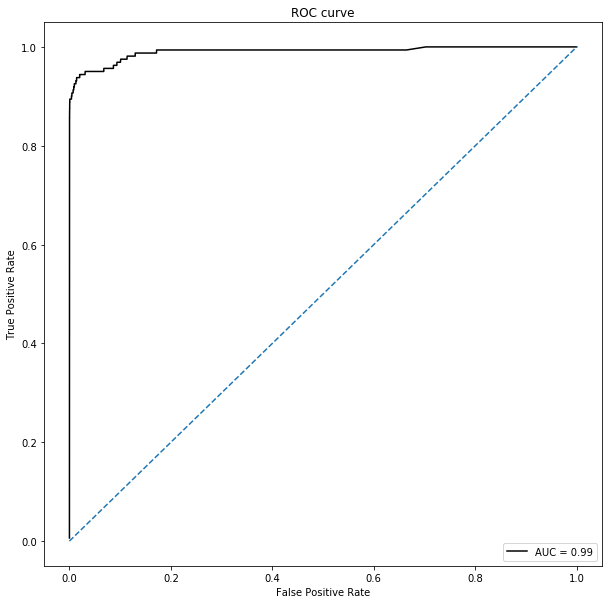

In [230]:
plt.figure(figsize=(10,10))
plt.title('ROC curve')
plt.plot(false_positive_rate_gbm,true_positive_rate_gbm, color='black',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [231]:
model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train, eval_metric=['auc'], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-auc:0.910678	validation_1-auc:0.928358
[1]	validation_0-auc:0.910678	validation_1-auc:0.928358
[2]	validation_0-auc:0.913703	validation_1-auc:0.928355
[3]	validation_0-auc:0.913713	validation_1-auc:0.928371
[4]	validation_0-auc:0.913723	validation_1-auc:0.928373
[5]	validation_0-auc:0.913717	validation_1-auc:0.928377
[6]	validation_0-auc:0.913727	validation_1-auc:0.928378
[7]	validation_0-auc:0.913729	validation_1-auc:0.928379
[8]	validation_0-auc:0.913734	validation_1-auc:0.928383
[9]	validation_0-auc:0.913741	validation_1-auc:0.928387
[10]	validation_0-auc:0.913757	validation_1-auc:0.928407
[11]	validation_0-auc:0.913765	validation_1-auc:0.928406
[12]	validation_0-auc:0.913777	validation_1-auc:0.928419
[13]	validation_0-auc:0.915294	validation_1-auc:0.925326
[14]	validation_0-auc:0.91531	validation_1-auc:0.925332
[15]	validation_0-auc:0.915313	validation_1-auc:0.925333
[16]	validation_0-auc:0.915314	validation_1-auc:0.925338
[17]	validation_0-auc:0.9168	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

[[93811    15]
 [   31   130]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93826
          1       0.90      0.81      0.85       161

avg / total       1.00      1.00      1.00     93987

0.9995105706108292
Area under the curve : 0.90


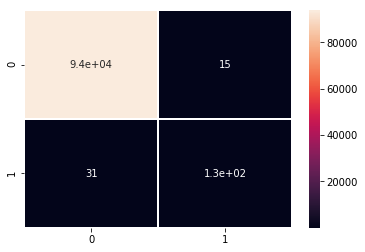

In [263]:
y_pred_xgb = model_xgb.predict(X_test)  

print(metrics.confusion_matrix(y_test, y_pred_xgb))

print(metrics.classification_report(y_test, y_pred_xgb))

print(metrics.accuracy_score(y_test, y_pred_xgb))
print('Area under the curve : %0.2f' % (metrics.roc_auc_score(y_test, y_pred_xgb)))

sns.heatmap(confusion_matrix,linewidths=.5,annot=True,vmin=0.01)

In [235]:
from sklearn.metrics import roc_curve, auc
false_positive_rate_xgb, true_positive_rate_xgb, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(false_positive_rate_xgb, true_positive_rate_xgb)

Text(0.5,0,'False Positive Rate')

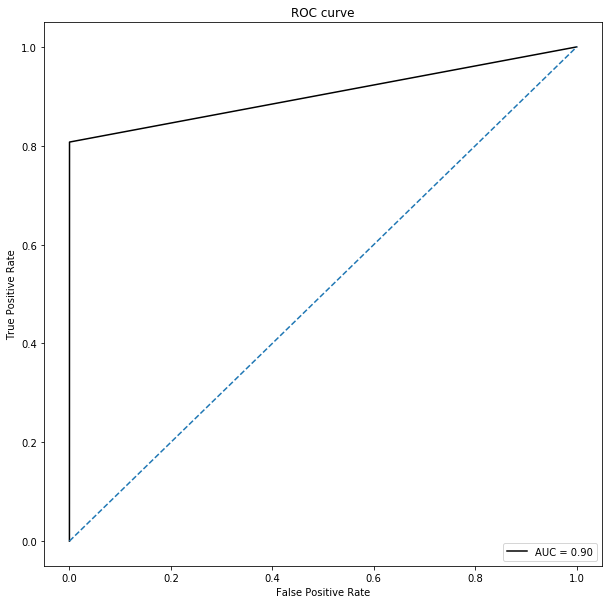

In [236]:
plt.figure(figsize=(10,10))
plt.title('ROC curve')
plt.plot(false_positive_rate_xgb,true_positive_rate_xgb, color='black',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [22]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

a = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
b = df['Class']


smote = SMOTE(random_state=42,ratio={1:1500})
X_sme, y_sme = smote.fit_sample(a, b)

xtrain, xtest, ytrain, ytest = train_test_split(X_sme, y_sme, test_size=0.30, random_state=0)

In [23]:
from xgboost.sklearn import XGBClassifier


xgb_smote = XGBClassifier()

xgb_smote.fit(xtrain, ytrain, eval_metric=['auc'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-auc:0.931703	validation_1-auc:0.92982
[1]	validation_0-auc:0.933591	validation_1-auc:0.930945
[2]	validation_0-auc:0.940646	validation_1-auc:0.937674
[3]	validation_0-auc:0.94065	validation_1-auc:0.937675
[4]	validation_0-auc:0.940685	validation_1-auc:0.937703
[5]	validation_0-auc:0.940692	validation_1-auc:0.937706
[6]	validation_0-auc:0.940693	validation_1-auc:0.937708
[7]	validation_0-auc:0.940705	validation_1-auc:0.937721
[8]	validation_0-auc:0.940705	validation_1-auc:0.937724
[9]	validation_0-auc:0.940705	validation_1-auc:0.937725
[10]	validation_0-auc:0.940706	validation_1-auc:0.937725
[11]	validation_0-auc:0.940707	validation_1-auc:0.937726
[12]	validation_0-auc:0.94071	validation_1-auc:0.937731
[13]	validation_0-auc:0.942591	validation_1-auc:0.937731
[14]	validation_0-auc:0.961014	validation_1-auc:0.956507
[15]	validation_0-auc:0.961013	validation_1-auc:0.956509
[16]	validation_0-auc:0.961009	validation_1-auc:0.956503
[17]	validation_0-auc:0.961018	validation_1-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [24]:
from sklearn import metrics

y_pred_sme = xgb_smote.predict(xtest) 

print(metrics.confusion_matrix(ytest, y_pred_sme))

print(metrics.classification_report(ytest, y_pred_sme))

print(metrics.accuracy_score(ytest, y_pred_sme))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred_sme)))

[[85285    17]
 [   55   388]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85302
          1       0.96      0.88      0.92       443

avg / total       1.00      1.00      1.00     85745

0.9991603008921803
Area under the curve : 0.937824


C:\Users\Vimal\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
